# Тема проектной работы - Проверить наличие взаимосвязи между продажами игр и платформой, годом, жанром, издателем. Выявить предпочтения регионов и их изменение со временем

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'svg' 

plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('vgsales.csv', encoding='utf-8')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


В данном датасете представлена информация по продажам игр с указанием имени игры, платформы на которой она продавалась, года выхода, жанра и издателя. Также для каждой игры приведены продажи в северной Америке(Далее СА), Европе, Японии, других странах и глобальные

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Как мы видим выше, у нас есть пропуски данных по году и издателю. Чтобы у нас не было перекосов по данным из-за пропусков избавимся от них. Также приведем год к типу int

In [4]:
data = data.dropna()
data['Year'] = data.Year.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Построим график продаж по годам

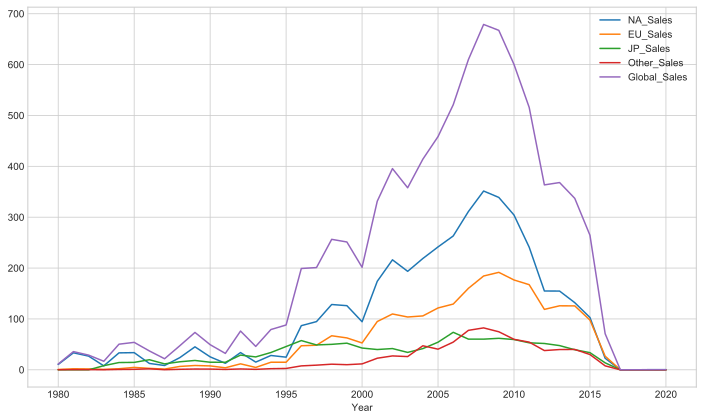

In [5]:
data.groupby('Year', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().plot(figsize=[12, 7], x='Year')

In [6]:
data.loc[data['Year'] >= 2015, 'Year'].describe()

count     960.000000
mean     2015.367708
std         0.509758
min      2015.000000
25%      2015.000000
50%      2015.000000
75%      2016.000000
max      2020.000000
Name: Year, dtype: float64

По графику мы видим, что после 2015 года у нас наблюдается резкое падение продаж, что нельзя объяснить экономическими причинами. Получив квартили распределения данных по годам(2015-2020), мы видими, что на 2015-2016 года приходится 75% данных, причем на один 2015 год половина данных. Из чего можно сделать вывод, что в нашем датасете данные с 2016 года не полные или отсутствуют вовсе

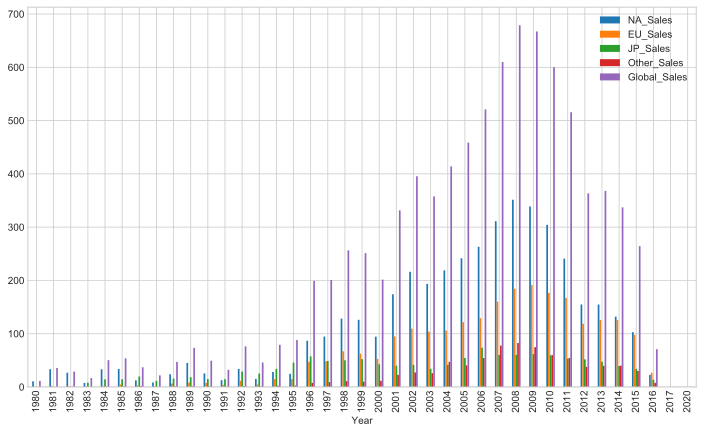

In [7]:
data.groupby('Year', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().plot(kind='bar', figsize=[12, 7], x='Year')

Построим график продаж игр в зависимости от платформы. 

По графику видим, что большая часть продаж приходится на консоли и в основном это консоли от Sony, Nintendo и Microsoft

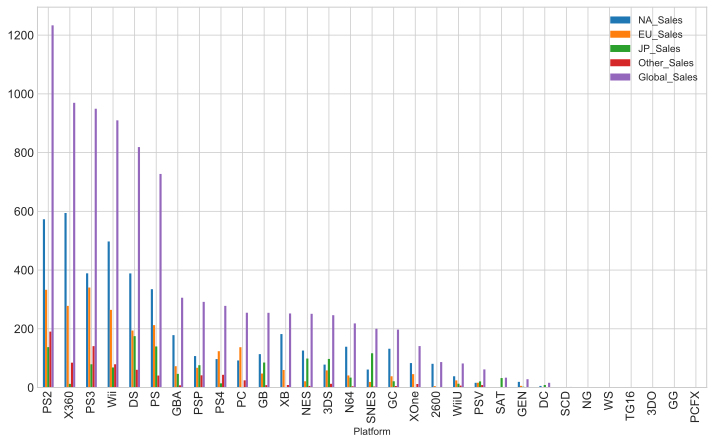

In [8]:
data.groupby('Platform', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending=False).plot(fontsize=12, grid=True,kind='bar',figsize=[12, 7], x='Platform')

Построим график продаж игр в зависимости от жанра. Так как нам больше интересны тут актуальные предпочтения, то возьмем данные с 2010 года. 

По графику видно, что игры жанра Action имеют более высокие продажи. Жанры Sports, Shooter, Role-Plying и Misc обладают также достаточно высокой популярностю у населения

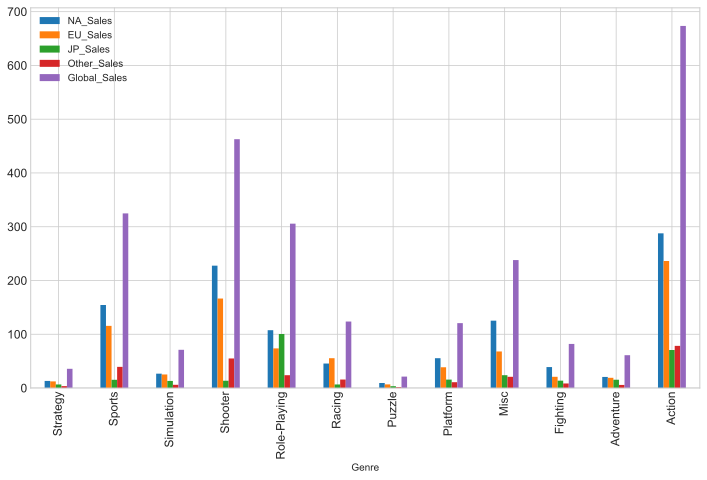

In [9]:
data.loc[data['Year'] >= 2010].groupby('Genre', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Genre', ascending=False).plot(fontsize=12, grid=True,kind='bar',figsize=[12, 7], x='Genre')

Построим график продаж игр в зависимости от издателя. Так как нам больше интересны тут актуальные предпочтения, то возьмем данные с 2010 года. В Связи с тем, что издателей за эти годы было довольно много, то выберем 20 крупнейших.

Из графика хорошо видно, что на Electronic Arts, Nintendo, Activision приходится львиная доля продаж

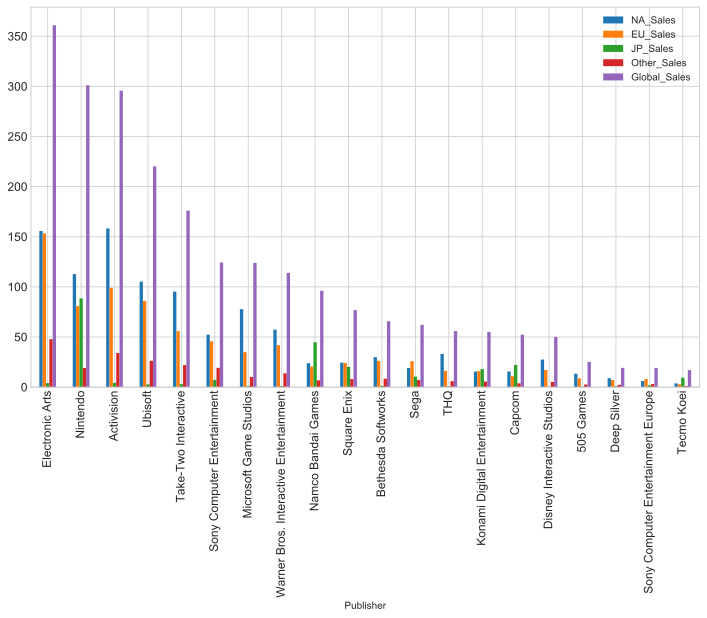

In [10]:
data.loc[data['Year'] >= 2010].groupby('Publisher', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending=False).head(20).plot(fontsize=12, grid=True,kind='bar',figsize=[12, 7], x='Publisher')

In [11]:
df = data.loc[data['Year'] >= 2010].groupby('Publisher', as_index=False)['Global_Sales'].sum().sort_values('Global_Sales', ascending=False)
df

,Publisher,Global_Sales
66,Electronic Arts,360.92
163,Nintendo,301.06
8,Activision,295.65
240,Ubisoft,220.14
223,Take-Two Interactive,176.04
...,...,...
179,Piacci,0.01
239,UIG Entertainment,0.01
177,Paradox Development,0.01
115,Inti Creates,0.01


Если же мы посчитаем, то выясним, что на эти 20 компаний приходится 91% продаж игр в мире

In [12]:
top = df['Global_Sales'].head(20).sum() / df['Global_Sales'].sum()
tail = df['Global_Sales'].tail(244).sum() /  df['Global_Sales'].sum()
top, tail

(0.9167394064434219, 0.08326059355657835)

Построим матрицу корреляций продаж

In [13]:
data[['NA_Sales','EU_Sales','JP_Sales', 'Global_Sales']].corr()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
NA_Sales,1.000000,0.768923,0.451283,0.941269
EU_Sales,0.768923,1.000000,0.436379,0.903264
JP_Sales,0.451283,0.436379,1.000000,0.612774
Global_Sales,0.941269,0.903264,0.612774,1.000000


Как видим между продажами в Европе и Северной Америке достаточно большая корреляция, а между глобальными продажами и Северной Америкой корреляция близка к единице. Чтобы убедиться, что использование корреляции Пирсона здесь корректно, проверим признаки на нормальности с помощью графического метода

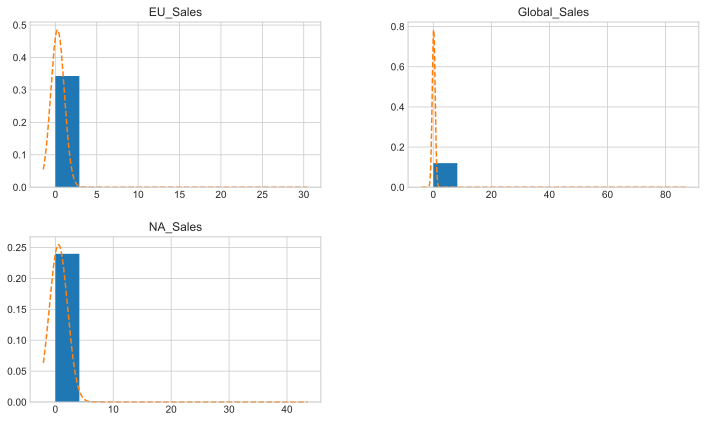

In [14]:
keys = ['NA_Sales','EU_Sales', 'Global_Sales']

axes = data[keys].hist(density=True, figsize=(12, 7))

for key, ax in zip(keys, axes.flatten()):
    loc = data[key].mean()
    scale = data[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')

Как видими все признаки распределены нормально

Построим тепловой график, чтобы увидеть предпочтения регионов по жанру и платформе

СА

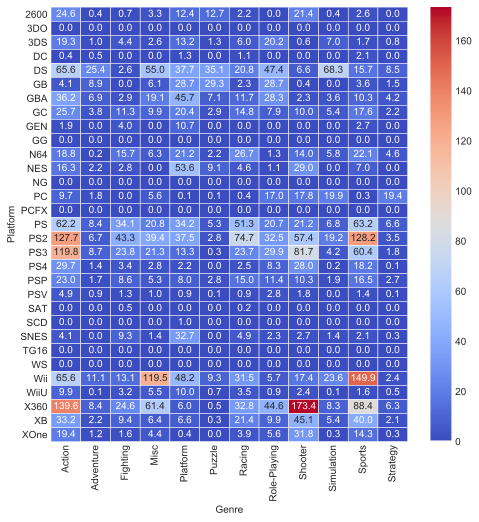

In [15]:
platform_genre_sales = data.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='NA_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap= 'coolwarm')

Как видим у игроков в СА явной популярностью пользуются 4 жанра игр. Приэтом если в жанре Action сразу несколько платформ имеют высокие оценки, то у жанров Misc и Shooter есть явные фавориты в лице Wii и X360 соответственно

Европа

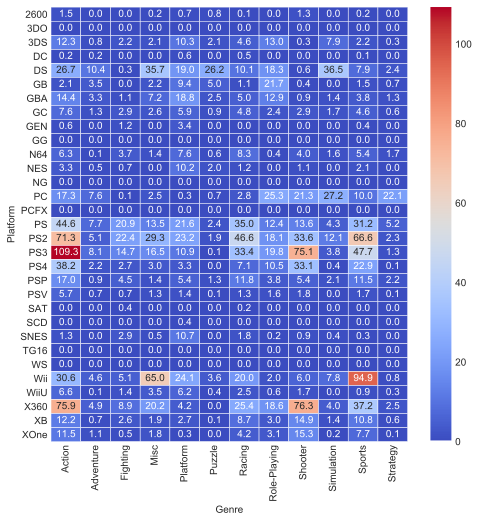

In [16]:
platform_genre_sales = data.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='EU_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap= 'coolwarm')

У игроков Европы предпочтения похожи, но нет такой любви к жанру Shooter

Япония

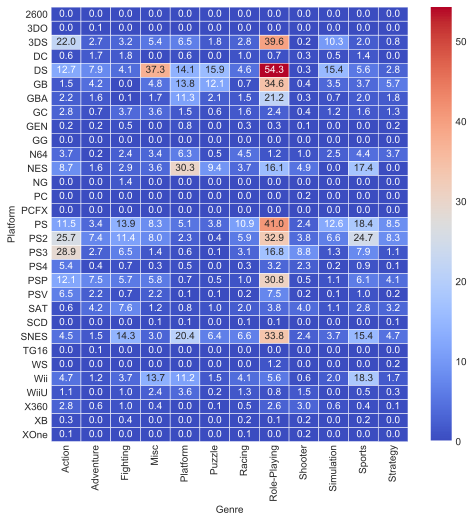

In [17]:
platform_genre_sales = data.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='JP_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap= 'coolwarm')

Игроки Японии кардинально отличаются по своим предпочтениям. Видим доминирование жанра Role-Playing. Приэтом в стране в почете карманные консоли в отличие от остального мира

Теперь посмотрим на как изменялись предпочтения игроков с годами по жанру

СА

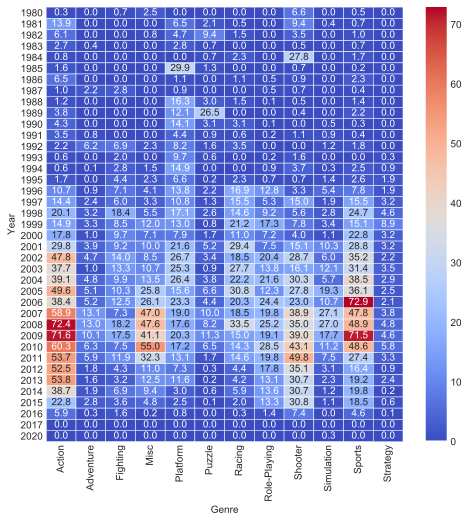

In [18]:
year_genre_sales = data.pivot_table(
                        index='Year', 
                        columns='Genre', 
                        values='NA_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(year_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap= 'coolwarm')

По графику видно, что изначально был достаточно популярен жанр Platform, причем свою актуальность он начал терять только с 2013 года. Остальные жанры кроме Adventure, Puzzle и Strategy обретают свою аудиторию в 1996 и с переменным успехом жили до 2010-2011 года. Особо выделяется жанр Shooter. Он не показывал каких-то рекордных показателей, как Action или Sports, но имеет достаточное стабильную аудиторию напротяжении многих лет

Европа

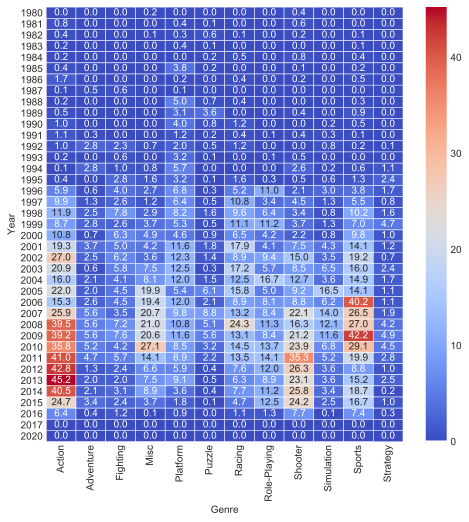

In [19]:
year_genre_sales = data.pivot_table(
                        index='Year', 
                        columns='Genre', 
                        values='EU_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(year_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap= 'coolwarm')

Картина в Европе похожа на СА, но тут налицо сдвиг показателей по годам. Из чего можно сделать вывод развлечения в виде игр стали популярны в Европе позднее чем в СА примерно на 5-6 лет

Япония

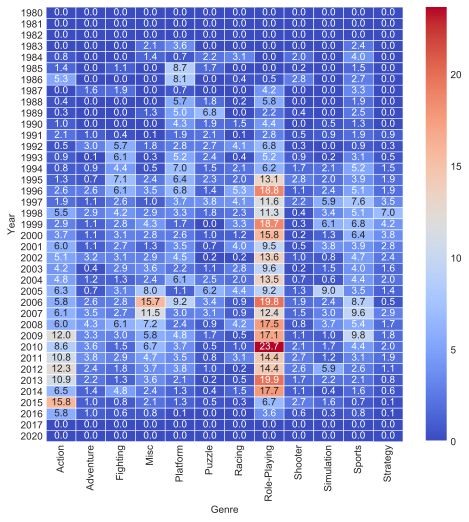

In [20]:
year_genre_sales = data.pivot_table(
                        index='Year', 
                        columns='Genre', 
                        values='JP_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(year_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap= 'coolwarm')

Как видим в Японии жанр Role-Playing держал пальму первенства на протяжении большинства лет и только в последние годы его потеснил жанр Action